# This stuff below actually works

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.activations import softplus

In [105]:
nout = 5
input_shape = (40,50,50)
l2_reg = 0.0
model = Sequential()
model.add(Flatten(input_shape = input_shape, name = 'hot'))
model.add(Dense(nout, kernel_initializer='glorot_normal', 
                kernel_regularizer = l2(l2_reg), name = 'damn'))
model.add(keras.layers.Activation('softplus', name = 'yee'))


In [106]:
model.inputs

[<tf.Tensor 'hot_input_5:0' shape=(?, 40, 50, 50) dtype=float32>]

In [107]:
model.outputs

[<tf.Tensor 'yee_4/Softplus:0' shape=(?, 5) dtype=float32>]

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hot (Flatten)                (None, 100000)            0         
_________________________________________________________________
damn (Dense)                 (None, 5)                 500005    
_________________________________________________________________
yee (Activation)             (None, 5)                 0         
Total params: 500,005
Trainable params: 500,005
Non-trainable params: 0
_________________________________________________________________


In [68]:
# the greater questions in life:
    # is there a greater purpose for us all?
    # how do we train a keras model without keras? 
    # coffee with or without milk?

In [109]:
# this is how we get the output of a model without... actually... having it...
model.get_layer('damn').output

<tf.Tensor 'damn_4/BiasAdd:0' shape=(?, 5) dtype=float32>

In [110]:
# do we need to do a model build?

In [111]:
model.layers[0].output

<tf.Tensor 'hot_5/Reshape:0' shape=(?, ?) dtype=float32>

In [112]:
model.layers[0].get_weights()

[]

https://github.com/fchollet/keras/issues/4220

In [114]:
model.build()

# Now we want to... test stuff out

In [80]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pymongo as pm
import numpy as np

x = np.linspace(-2, 2, 101)[np.random.RandomState(0).permutation(101)]
y = x ** 3 - 1

In [81]:
port = 24444
host = 'localhost'
connection = pm.MongoClient(port = port, host = host)

entries = []
for i in range(101):
    entries.append({'x': x[i], 'y': y[i]})
connection['tasks']['polyfunction'].insert_many(entries)

[-2.0, -2.0, -2.0, -2.0, -1.96, -1.96, -1.96, -1.96, -1.92, -1.92, -1.92, -1.92, -1.88, -1.88, -1.88, -1.88, -1.84, -1.84, -1.84, -1.84, -1.8, -1.8, -1.8, -1.8, -1.76, -1.76, -1.76, -1.76, -1.72, -1.72, -1.72, -1.72, -1.68, -1.68, -1.68, -1.68, -1.6400000000000001, -1.6400000000000001, -1.6400000000000001, -1.6400000000000001, -1.6, -1.6, -1.6, -1.6, -1.56, -1.56, -1.56, -1.56, -1.52, -1.52, -1.52, -1.52, -1.48, -1.48, -1.48, -1.48, -1.44, -1.44, -1.44, -1.44, -1.4, -1.4, -1.4, -1.4, -1.3599999999999999, -1.3599999999999999, -1.3599999999999999, -1.3599999999999999, -1.3199999999999998, -1.3199999999999998, -1.3199999999999998, -1.3199999999999998, -1.28, -1.28, -1.28, -1.28, -1.24, -1.24, -1.24, -1.24, -1.2, -1.2, -1.2, -1.2, -1.1600000000000001, -1.1600000000000001, -1.1600000000000001, -1.1600000000000001, -1.12, -1.12, -1.12, -1.12, -1.08, -1.08, -1.08, -1.08, -1.04, -1.04, -1.04, -1.04, -1.0, -1.0, -1.0, -1.0, -0.96, -0.96, -0.96, -0.96, -0.9199999999999999, -0.9199999999999999, -

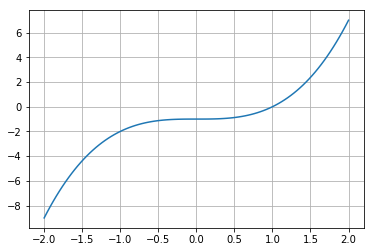

In [82]:
entries = connection['tasks']['polyfunction'].find({'x': {'$exists' : True}}, projection=['x', 'y']).sort([('x',pm.ASCENDING)])
x = [entry['x'] for entry in entries]
print(x)
entries = connection['tasks']['polyfunction'].find({'x': {'$exists' : True}}, projection=['x', 'y']).sort([('x',pm.ASCENDING)])
y = [entry['y'] for entry in entries]
plt.plot(x,y)
plt.grid()

In [83]:
import tensorflow as tf
from __future__ import division
from tfutils import base, data, optimizer, utils

# delete exp1
connection['mnist']['simple.files'].delete_many({'exp_id' : 'exp1'})


In [ ]:
def mnist_model(inputs, train = True, **kwargs):
    nout = 5
    input_shape = (40,50,50)
    l2_reg = 0.0
    model = Sequential()
    model.add(Flatten(input_shape = input_shape, name = 'hot'))
    model.add(Dense(nout, kernel_initializer='glorot_normal', 
                    kernel_regularizer = l2(l2_reg), name = 'damn'))
    model.add(keras.layers.Activation('softplus', name = 'yee'))

In [101]:
nout = 5
input_shape = [784]
l2_reg = 0.0
model = Sequential()
model.add(Flatten(input_shape = input_shape, name = 'hot'))
model.add(Dense(nout, kernel_initializer='glorot_normal', 
                kernel_regularizer = l2(l2_reg), name = 'damn'))
model.add(keras.layers.Activation('softplus', name = 'yee'))

ValueError: Input 0 is incompatible with layer hot: expected min_ndim=3, found ndim=2

In [99]:
nout = 5
input_shape = (40,50,50)
l2_reg = 0.0
model = Sequential()
model.add(Dense(nout, kernel_initializer='glorot_normal', 
                kernel_regularizer = l2(l2_reg), name = 'damn'))
model.add(keras.layers.Activation('softplus', name = 'yee'))


ValueError: The first layer in a Sequential model must get an `input_shape` or `batch_input_shape` argument.

In [ ]:
def mnist_model(inputs, train = True, **kwargs):
    # set up the model and then query it
    
    nout = 5
    input_shape = (784)
    l2_reg = 0.0
    model = Sequential()
#     model.add(Flatten(input_shape = input_shape, name = 'hot'))
    model.add(Dense(nout, kernel_initializer='glorot_normal', 
                    kernel_regularizer = l2(l2_reg), name = 'damn'))
    model.add(keras.layers.Activation('softplus', name = 'yee'))

https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models

In [85]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

NameError: name 'Model' is not defined

In [87]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

NameError: name 'Model' is not defined

In [94]:
from keras.models import Model


https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models